# Databaser och visualisering
I denna föreläsning/workshop skall vi titta ännu närmare på data, typer av data, samt visualisering av denna. Detta blir alltså ett av de första tillfällena för tillämpning av det ni fått lära er.

Vi kommer i denna workshop använda oss huvudsakligen av färdiga funktioner, och bibliotek av funktionalitet. Dessa **importeras** till ett program innan de kan användas som inbyggda eller egendefinierade funktioner.

I slutet av passet kommer ni att ha lärt er mer om
- Olika typer av visualiseringar, grafer
- Numeriska och kategoriska data
- Läsa in data från Excel-blad och visualisera denna 

Vi kommer att använda oss av ett antal programmeringsmässiga koncept, nämligen
- Variabler
- Listor
- funktioner

samt indirekt så kallade moduler.

## Ordinala vs. Kategoriska variabler
Vi har tidigare diskuterat datatyper i kontexten programmering. Inom dataanalys talar man också ofta om *datatyper*. Datatyper har dock som sagt nivåer av abstraktion. En abstraktion är uppdelningen av data som *ordinal* eller *kategorisk*. 

I enkla termer är ordinala variabler numeriska, och kategoriska utgörs av kategorier, strängar. Det är dock en förenkling. Ordinala data har en inneboende *ordning*, såsom `[1, 2.12, 3.0, 4, 1000]`, men det inkluderar också `[grundskola, gymnasium, högskola]` som är implicit ordnade. Kategoriska variabler saknar en sådan ordning. Det finns inget större än/högre än/längre än/bättre än mellan `[man, kvinna, annat, okänt]` eller `[blond, brunett, svarthårig]`.

Den huvudsakliga effekten av vilken typ av variabel man visualiserar är i princip om färgskalan och värdena är diskreta eller ej. En diskret/kvalitativ färgskala passar kategoriska variabler bäst, där man söker kontrast. För ordinala variabler vill man ha en kontinuerlig färgskala, där färgerna visar på förhållandet mellan värdena, såsom varmt/kallt. Jämför gärna med denna länk: [https://matplotlib.org/stable/tutorials/colors/colormaps.html]()

## Grafer, diagram, figurer, plottar
Kärt barn har många namn. Inom dataanalys är det ofta relevant att visualisera sina data. Dessa är alltjämt numeriska, även om det finns undantag. Vanliga verktyg för detta inkluderar Excel, som ju förutom sina databas-liknande egenskaper, också har stöd för visualisering och presentation. I allmänhet så är detta dock ett något begränsande verktyg, och de mest flexibla visualiseringarna programmerar man själv.

Vi kommer här gå igenom ett antal välkända och användbara visualiseringar för lite olika typer av data. Dessa presenteras i form av vad som ibland kallas grafer, diagram, figurer eller plottar (eng. *plots*). Inget ord är utom *plot* är egentligen allmängiltigt och syftar vanligtvis på annat.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Scatterplot, punktdiagram
En så kallad scatterplot är en figur där varje dataelement svarar mot exakt en punkt. Varje punkt har två koordinater, ett *x*- och ett *y*-värde, motsvarande horisontell och vertikal axel. Faktum är att detta gäller för i stort sätt alla 2D-visualiseringar i bild.

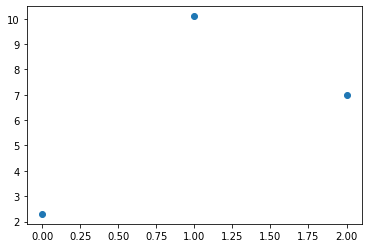

In [2]:
x = [0, 1, 2]
y = [2.3, 10.1, 7]

plt.scatter(x, y)
plt.show() # Used to display figures, not necessary in Jupyter, but good practice anyway

Vi kan stilsätta visualiseringar, exempelvis en scatterplot genom olika *argument* till funktionerna:

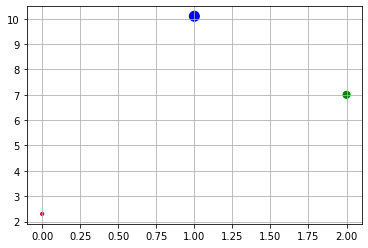

In [3]:
sizes   = [10, 100, 50]
colours = ['red', 'blue', 'green']
plt.grid() # Turns on a grid
plt.scatter(x, y, s=sizes, c=colours)
plt.show()

### Linjediagram
Ett linjediagram bör användas i huvudsak när det finns en anledning att sammanfoga punkter, då de följer någon form av tidsaxel, eller för att enkelt kunna visa på skillnader mellan närliggande punkter. Oftast används de i sammanhang där *x*-axeln syftar på tid.

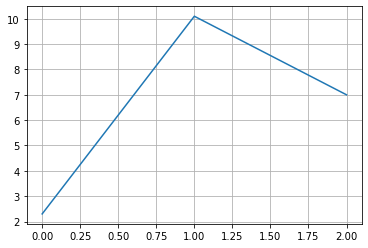

In [4]:
x = [0, 1, 2]
y = [2.3, 10.1, 7]

plt.plot(x, y)
plt.grid()
plt.show()

### Stapeldiagram
Stapeldiagram är en annan typ av väldigt viktig visualisering. Dessa anger antal av kategoriska variabler, det vill säga hur mycket man har av en viss mängd. Dessa kräver att man har en färdigräknad sammanställning av sina data.

Ett exempel på detta är mandatfördelningen efter Riksdagsvalet 2022.

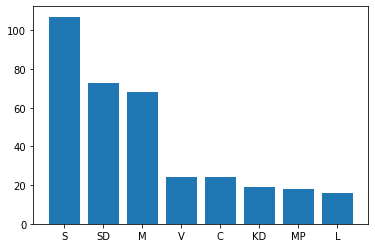

In [28]:
party_labels = ["S", "SD", "M", "V", "C", "KD", "MP", "L"]
n_mandates = [107, 73, 68, 24, 24, 19, 18, 16]
plt.bar(party_labels, height=n_mandates)
plt.show()

Stapeldiagram kallas också för *bar plots*, och bör betraktas som det lämpligaste alternativet för att presentera både proportioner och antal. Dessa har etiketter motsvarande det som räknas på x-axeln, och deras motsvarande antal eller värde som en *höjd* på y-axeln. 

Ett annat vanligt alternativ är vad som kallas för *pie chart* eller tårtdiagram på svenska. Här måste oftast etiketterna differentieras med färger, och antalet motsvarar storleken på tårtbiten. Detta är alltid ett dåligt visualiseringsalternativ, eftersom det är oerhört svårt att särskilja storleksskillnader mellan de olika etiketterna.

[]

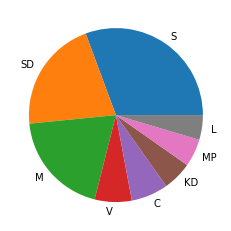

In [27]:
plt.pie(n_mandates, labels=party_labels)
plt.plot()

### Histogram
Ett histogram är förvillande likt ett stapeldiagram, eftersom det också använder sig av staplar, samt visualiserar antal. Ett histogram räknar emellertid hur många gånger ett värd (eller ett intervall av värden) förekommer. Detta resulterar i en *fördelning* (eng. *distribution*) av värden.

Ett histogram har alltså oftast endast ett argument - en lista på värden, där man vill studera hur vanliga vissa specifika värden eller intervaller är. Man brukar således definiera en intervallängd

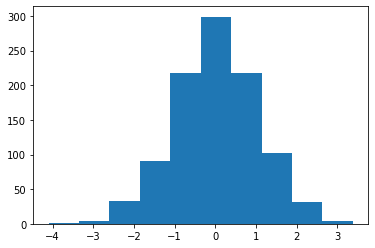

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 random numbers
randum_numbers = np.random.randn(1000)

plt.hist(randum_numbers)
plt.show()

Detta skall uttydas att vi fick ungefär 200 värden mellan -1 och 0.5, 300 värden mellan -0.5 och 0.5, samt mycket få från 2.5 och uppåt.

## Läsning av Excel-data
Vi tittar på ett mer avancerat exempel. Vi skall nu läsa data från ett Excel-blad, med hjälp av den inbyggda läsarfunktionen `.read_excel` i Pandas.

In [11]:
filepath = "./reviews.xlsx" # Our data

df = pd.read_excel(filepath)

In [13]:
# Used to view the first rows in the dataframe
n_rows_to_preview = 10
df.head(n_rows_to_preview)

,Unnamed: 0,id,title,author,media,forum,date,critic,n_words,genre,gender_of_author,gender_of_critic,year,tokenized_text,x,y
0,0,0,Farliga makter,Gustaf af Geijerstam,A,ARB,2261,Bengt Lidforss,11084.0,prosa,man,man,1906,"['månad', 'förfluta', 'ny', 'roma', 'synlig', ...",6.584388,-19.183805
1,1,1,Hafvets stjärna,Vilhelm Ekelund,A,ARB,2274,H. J.,9100.0,lyrik,man,okänt,1906,"['ny', 'diktsamling', 'börja', 'bli', 'litterä...",5.422143,-18.430254
2,2,2,Kronans kaka,Ernst Didring,A,ARB,2469,Algot Ruhe,7417.0,prosa,man,man,1906,"['den', 'dag', 'ljus', 'förlag', 'utkomma', 's...",7.632763,-19.654898
3,3,3,Ur djupet,Leon Larsson,A,ARB,2476,Bengt Lidforss,5462.0,lyrik,man,man,1906,"['den', 'finnas', 'nutida', 'samhälle', 'männi...",6.097462,-18.520895
4,4,4,Gåtor på tidens strand,Olof Hermelin,A,SDS,2479,okänt,4713.0,lyrik,man,okänt,1906,"['gammal', 'frisk', 'landskapsmålare', 'folkvä...",6.045069,-19.144112
5,5,5,Nattens röster,Anders Österling,A,SDS,2492,Hans Emil Larsson,6192.0,dramatik,man,man,1906,"['ung', 'lyriker', 'som', 'vinna', 'åtskillig'...",6.444095,-18.341288
6,6,6,Det flyende bord,Gabriel Scott,A,AB,2258,Fredrik Vetterlund,2055.0,barn,man,man,1906,"['flyvende', 'Bord”', 'saga', 'skräddare', 'so...",7.281005,-18.551483
7,7,7,Bland marsmänniskor,Oskar Hoffmann,A,AB,2258,Fredrik Vetterlund,1825.0,prosa,man,man,1906,"['man', 'malgré', 'gammal', '”oförbännelig', '...",6.524424,-19.547392
8,8,8,Natalika,Lecardio Hearn,A,AB,2272,Fredrik Vetterlund,1160.0,prosa,man,man,1906,"['japanspecialist', 'par', 'preference', 'verk...",5.981799,-19.493965
9,9,9,Den stora vreden,Olof Högberg,A,AB,2279,J. A. Runström,9093.0,prosa,man,man,1906,"['våras', 'sammandragen', 'upplaga', 'arbete',...",6.131768,-19.612751


Denna fil innehåller data på recensionstexter av litteratur från 1906, 1956, samt 2006. Texterna har processats så att de inte längre omfattas av upphovsrätt. De har också alla ett antal metadata, exempelvis författare, titel, genre, samt färdigberäknade koordinater *x* och *y*. 

En dataframe är i princip ett väldigt avancerat dictionary, och man kan komma åt datan i varje kolumn på ett väldigt bekant sätt:

In [63]:
print(df["title"], df["genre"])

0                             Farliga makter
1                            Hafvets stjärna
2                               Kronans kaka
3                                  Ur djupet
4                     Gåtor på tidens strand
                       ...                  
695           Gravidchock! Reporter erkänner
696    I en cylinder i vattnet av vattengråt
697                    Birgitta och Katarina
698                               Lunar Park
699                    Änglar och Sparbeting
Name: title, Length: 700, dtype: object 0      prosa
1      lyrik
2      prosa
3      lyrik
4      lyrik
       ...  
695    prosa
696    lyrik
697    prosa
698    prosa
699    prosa
Name: genre, Length: 700, dtype: object


Dessa blir i princip listor, och motsvarar alltså kolumnformatet i vår tabellrepresentation ifrån tidigare.


Vi skall för denna del av workshopen använda oss av ett annat bibliotek för visualisering, nämligen *Seaborn*. Detta är särskilt anpassat för att plotta data från dataframes och databaser. Det är också i huvudsak kolumnorienterat, vilket är väsentligt vanligare i denna kontext. Seaborn är kompatibelt med matplotlib, så man kan kombinera många av deras funktioner.

Som första exempel tittar vi på hur långa recensionstexterna vanligtvis är. I kolumnen `n_words` så anges alltså recensionernas längd i antalet ord. 

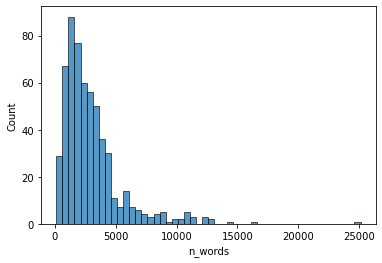

In [60]:
import seaborn as sns

sns.histplot(df, x="n_words", binwidth=500)
plt.show()

Resultatet är väntat. De flesta recensioner har ungefär samma längd, mellan 0 och 5000 ord. De allra kortaste är så kallade *anmälningar*, medan den skarpa dippen vid 5000 ord troligen motsvarar ungefär en kolumn i en dagstidning. Det finns också några enstaka outliers med runt 15000 och 25000 ord. Dessa är sannolikt samlingsrecensioner, där flera verk kritiseras samtidigt.

Vi kanske nu är intresserade av att dissekera den här fördelningen av texternas längd på kritikernas kön. Kan det vara så att manliga kritiker skriver längre texter än deras kvinnliga dito? 

Vi kan separera längderna på texterna efter kön genom att använda parametern *hue* i `histplot`. Då får vi 4 histogram färglagda efter könet på kritikerna. Emellertid kan dessa bli svårlästa.

<AxesSubplot:xlabel='n_words', ylabel='Count'>

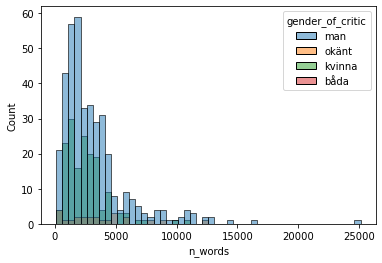

In [56]:
sns.histplot(df, x="n_words", hue="gender_of_critic", binwidth=500)
plt.show()

Genom att använda funktionen *stripplot* i Seaborn kan vi separera histogram på kategoriska variabler (såsom kön). Dessa visar varje recension som en punkt, placerad på en höjd motsvarande hur många ord texten innehåller. För att få en känsla för hur många texter som har en viss längd får man titta på tätheten/densiteten hos punkterna.

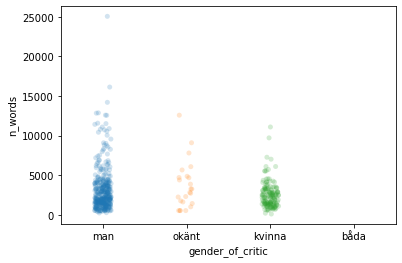

In [55]:
sns.stripplot(data=df, x="gender_of_critic", y="n_words", alpha=0.2)
plt.show()

Vi testar att visualisera recensionerna som en scatterplot, där varje punkt alltså motsvarar en recension av ett verk. Koordinaterna är baserade på ömsesidig textlikhet, det vill säga texter som liknar varandra ordvalsmässigt kommer att placeras nära varandra i figuren.

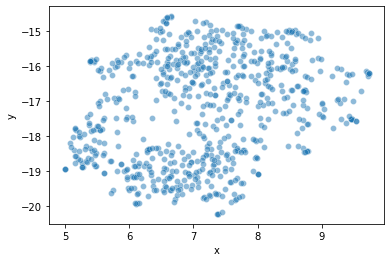

In [58]:
sns.scatterplot(data=df, x="x", y="y", alpha=0.5)
plt.show()

Vi lägger vidare till nödvändig information som titel och etiketter (*labels*) på axlarna.

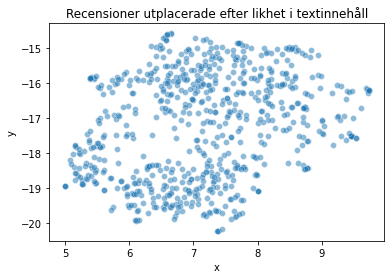

In [59]:
sns.scatterplot(data=df, x="x", y="y", alpha=0.5)

plt.xlabel("x") 
plt.ylabel("y")
plt.title("Recensioner utplacerade efter likhet i textinnehåll")
plt.show()

I allmänhet så behövs ytterligare ett lager för att differentiera informationen i en figur, exempelvis färg. Precis som att vi tidigare kunde ange en *hue* för att färglägga punkterna efter en viss kolumn i det tidigare histogrammet, kan vi använda det här för att färglägga recensionernas årtal!

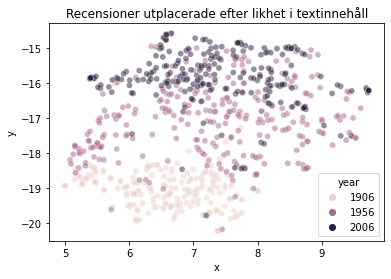

In [61]:
sns.scatterplot(data=df, x="x", y="y", hue="year", alpha=0.5)
plt.xlabel("x") 
plt.ylabel("y")
plt.title("Recensioner utplacerade efter likhet i textinnehåll")
plt.show()



Från dessa syns en tydlig separation mellan textlikheten beroende av årtalet för när de skrevs. Detta tillskrivs bland annat att vissa ord blivit förlegade och att nya tillkommit, men även att kritikspråket delvis förändrats.

## Uppgift
Workshopen är huvudsakligen interaktiv och utforskande. Den kommer att "examineras" i form av en kort redovisning i slutet av föreläsningen. 

I kort skall ni
- Samla in data från Wikipedia i ett Excel-blad.
  - Samla minst 20 rader
  - Förslag: 
    - Befolkningsdata i några svenska städer över ett antal år
    - Partiledare eller preseidenter, ålder, mandatperiod, m.m.
    - Topplistan på svensk radio ett antal år. Berika datan med hur länge den stannade i topp, sångarens kön, ålder m.m.
- Läsa in datan i en notebook
- Visualisera datan
  - Lämpligen bör ni samla in några kategoriska och några numeriska variabler.
- Använda er av ett dataset inbyggt i Seaborn, som går att ladda med hjälp av 

```python
dataset_name = ...
df = sns.load_dataset(dataset_name)
```
där datasetsnamnet finns i följande lista: [https://github.com/mwaskom/seaborn-data]()